#  Data Understanding and Cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("swiggy.csv")

In [3]:
df

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json
...,...,...,...,...,...,...,...,...,...,...,...
148536,553122,The Food Delight,Yavatmal,--,Too Few Ratings,₹ 200,"Fast Food,Snacks",21522053000452,https://www.swiggy.com/restaurants/the-food-de...,"The Food Delight, 94MC+X35, New Singhania Naga...",Menu/553122.json
148537,562647,MAITRI FOODS & BEVERAGES,Yavatmal,--,Too Few Ratings,₹ 300,Pizzas,license,https://www.swiggy.com/restaurants/maitri-food...,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...",Menu/562647.json
148538,559435,Cafe Bella Ciao,Yavatmal,--,Too Few Ratings,₹ 300,"Fast Food,Snacks",21522251000378,https://www.swiggy.com/restaurants/cafe-bella-...,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...",Menu/559435.json
148539,418989,GRILL ZILLA,Yavatmal,--,Too Few Ratings,₹ 250,Continental,21521251000241,https://www.swiggy.com/restaurants/grill-zilla...,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...",Menu/418989.json


In [4]:
df.shape

(148541, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148541 non-null  object
 9   address       148455 non-null  object
 10  menu          148541 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB


In [6]:
df = df.drop(columns=['lic_no', 'address', 'link', 'menu'])

In [14]:
df.columns

Index(['id', 'name', 'city', 'rating', 'rating_count', 'cost', 'cuisine'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
dtypes: int64(1), object(6)
memory usage: 7.9+ MB


In [38]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.isnull().sum()

id                0
name             86
city              0
rating           86
rating_count     86
cost            131
cuisine          99
dtype: int64

In [15]:
df.describe()

,id
count,148541.000000
mean,363466.378912
std,167890.977174
min,211.000000
25%,233320.000000
50%,412628.000000
75%,502223.000000
max,581031.000000


In [16]:
df['rating'] = df['rating'].replace('--', np.nan)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating'] = df['rating'].fillna(df['rating'].mean())


In [18]:
df['cost'] = df['cost'].replace(['---', '--', ' ', 'NA'], np.nan)
df['cost'] = df['cost'].astype(str).str.replace('₹', '', regex=False).str.strip()
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')
df['cost'].median()
df['cost'] = df['cost'].fillna(df['cost'].median())
df['cost'] = df['cost'].round().astype('Int64')

In [23]:
df['name'].isna().sum()
df = df.dropna(subset=['name'])

In [27]:
df['cuisine'].isna().sum()
df = df.dropna(subset=['cuisine'])

In [40]:
s = df['rating_count'].astype(str).str.strip().str.lower()
mask_too_few = s.str.contains('too few', na=False)
numbers = s.str.extract(r'(\d+)', expand=False)
df['rating_count'] = np.where(
    mask_too_few,
    5,                                  
    pd.to_numeric(numbers, errors='coerce')
)
df['rating_count'] = df['rating_count'].fillna(5)
df['rating_count'] = df['rating_count'].astype(int)


In [41]:
df.isnull().sum()

id              0
name            0
city            0
rating          0
rating_count    0
cost            0
cuisine         0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148442 entries, 0 to 148540
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            148442 non-null  int64  
 1   name          148442 non-null  object 
 2   city          148442 non-null  object 
 3   rating        148442 non-null  float64
 4   rating_count  148442 non-null  int64  
 5   cost          148442 non-null  Int64  
 6   cuisine       148442 non-null  object 
dtypes: Int64(1), float64(1), int64(2), object(3)
memory usage: 9.2+ MB


In [43]:
df.head(20)

,id,name,city,rating,rating_count,cost,cuisine
0,567335,AB FOODS POINT,Abohar,3.894461,5,200,"Beverages,Pizzas"
1,531342,Janta Sweet House,Abohar,4.400000,50,200,"Sweets,Bakery"
2,158203,theka coffee desi,Abohar,3.800000,100,100,Beverages
3,187912,Singh Hut,Abohar,3.700000,20,250,"Fast Food,Indian"
4,543530,GRILL MASTERS,Abohar,3.894461,5,250,"Italian-American,Fast Food"
5,158204,Sam Uncle,Abohar,3.600000,20,200,Continental
6,156588,shere punjab veg,Abohar,4.000000,100,150,North Indian
7,244866,Shri Balaji Vaishno Dhaba,Abohar,3.894461,5,100,North Indian
8,156602,Hinglaj Kachori Bhandhar,Abohar,4.200000,20,100,"Snacks,Chaat"
9,158193,yummy hub,Abohar,3.894461,5,200,Indian


In [39]:
df.to_csv('cleaned_data.csv', index=False)


# Data Preprocessing 

In [45]:
df.isna().sum()

id              0
name            0
city            0
rating          0
rating_count    0
cost            0
cuisine         0
dtype: int64

In [46]:
df.dtypes

id                int64
name             object
city             object
rating          float64
rating_count      int64
cost              Int64
cuisine          object
dtype: object

# features Selection

In [47]:
categorical_cols = ['city', 'cuisine']
numeric_cols = ['rating', 'rating_count', 'cost']

In [50]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import pickle

categorical_cols = ['city', 'cuisine']
numeric_cols = ['rating', 'rating_count', 'cost']

encoder = OneHotEncoder(
    sparse_output=False,
    handle_unknown='ignore'
)

encoded_cat = encoder.fit_transform(df[categorical_cols])

encoded_cat_cols = encoder.get_feature_names_out(categorical_cols)

encoded_cat_df = pd.DataFrame(
    encoded_cat,
    columns=encoded_cat_cols,
    index=df.index
)

encoded_df = pd.concat(
    [df[numeric_cols], encoded_cat_df],
    axis=1
)

In [51]:
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

encoded_df.to_csv('encoded_data.csv', index=False)

# Verify both csv file are same

In [53]:
clean_df = pd.read_csv('cleaned_data.csv')
encoded_df = pd.read_csv('encoded_data.csv')

(clean_df.index == encoded_df.index).all()


np.True_

In [54]:
clean_df.shape, encoded_df.shape


((148442, 7), (148442, 2956))

In [55]:
import pickle

with open('encoder.pkl', 'rb') as f:
    encoder = pickle.load(f)

encoder_features = encoder.get_feature_names_out(['city', 'cuisine'])


In [56]:
set(encoder_features).issubset(set(encoded_df.columns))


True

In [57]:
i = 10   # koi bhi index

clean_df.loc[i, ['city', 'cuisine', 'rating', 'rating_count', 'cost']]
encoded_df.loc[i].head(10)


rating                           3.894461
rating_count                     5.000000
cost                           300.000000
city_Abids & Koti,Hyderabad      0.000000
city_Abohar                      1.000000
city_Adajan,Surat                0.000000
city_Adilabad                    0.000000
city_Adityapur                   0.000000
city_Adoni                       0.000000
city_Adyar,Chennai               0.000000
Name: 10, dtype: float64

In [58]:
sample_input = clean_df[['city', 'cuisine']].iloc[[0]]
encoder.transform(sample_input)


array([[0., 1., 0., ..., 0., 0., 0.]])

# Model Training through K means

In [59]:
import pandas as pd

encoded_df = pd.read_csv('encoded_data.csv')

In [61]:
encoded_df

,rating,rating_count,cost,"city_Abids & Koti,Hyderabad",city_Abohar,"city_Adajan,Surat",city_Adilabad,city_Adityapur,city_Adoni,"city_Adyar,Chennai",...,"cuisine_Vietnamese,Snacks",cuisine_Waffle,"cuisine_Waffle,Bakery","cuisine_Waffle,Beverages","cuisine_Waffle,Burgers","cuisine_Waffle,Chinese","cuisine_Waffle,Desserts","cuisine_Waffle,Fast Food","cuisine_Waffle,Ice Cream","cuisine_Waffle,Snacks"
0,3.894461,5,200,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.400000,50,200,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.800000,100,100,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.700000,20,250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.894461,5,250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148437,3.894461,5,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148438,3.894461,5,300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148439,3.894461,5,300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148440,3.894461,5,250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(encoded_df)

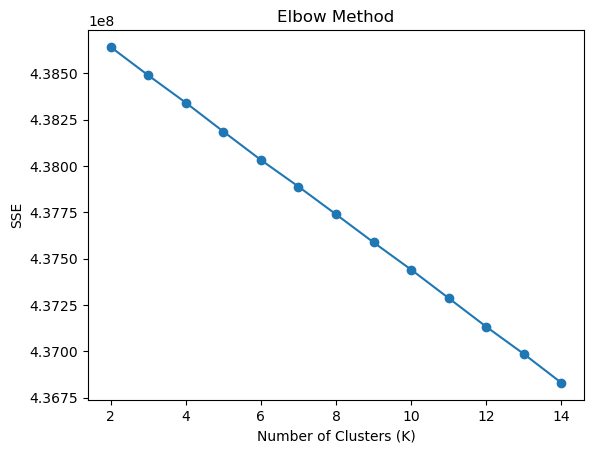

In [62]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
K_range = range(2, 15)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    sse.append(km.inertia_)

plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

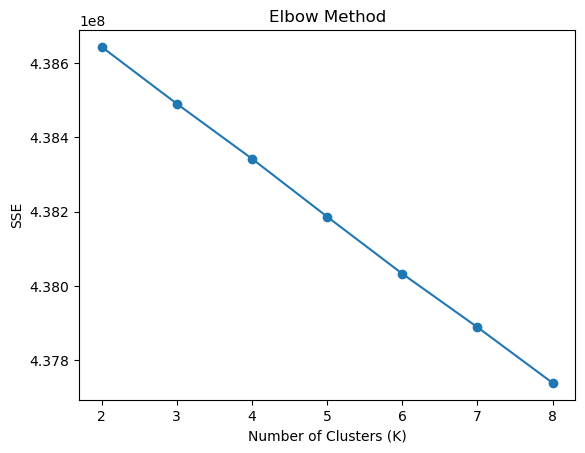

In [63]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
K_range = range(2, 9)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    sse.append(km.inertia_)

plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [64]:
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

In [65]:
clean_df = pd.read_csv('cleaned_data.csv')

clean_df['cluster'] = cluster_labels


In [66]:
import pickle

with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [67]:
clean_df['cluster'].value_counts()

cluster
1    142581
2      2489
3      1539
5      1111
8       315
0       101
7       101
4       100
6        77
9        28
Name: count, dtype: int64

# Recommendation Result Mapping (K-Means)

In [5]:
import pandas as pd
import pickle

clean_df   = pd.read_csv('cleaned_data.csv')
encoded_df = pd.read_csv('encoded_data.csv')

with open('kmeans_model.pkl', 'rb') as f:
    kmeans = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)


In [6]:
X_scaled = scaler.transform(encoded_df)
clean_df['cluster'] = kmeans.predict(X_scaled)


In [7]:
clean_df.to_csv('cleaned_data_with_clusters.csv', index=False)


In [9]:
def recommend_by_restaurant(
    restaurant_name,
    clean_df,
    top_n=10
):
    # 1) check restaurant exists
    if restaurant_name not in clean_df['name'].values:
        return pd.DataFrame()

    # 2) selected restaurant row
    sel = clean_df[clean_df['name'] == restaurant_name].iloc[0]
    cluster_id = sel['cluster']

    # 3) same-cluster restaurants (exclude itself)
    candidates = clean_df[
        (clean_df['cluster'] == cluster_id) &
        (clean_df['name'] != restaurant_name)
    ].copy()

    # 4) rank (rating desc, rating_count desc)
    candidates = candidates.sort_values(
        by=['rating', 'rating_count'],
        ascending=[False, False]
    )

    # 5) top-N
    cols = ['name', 'city', 'cuisine', 'rating', 'rating_count', 'cost']
    return candidates[cols].head(top_n)


In [11]:
recommend_by_restaurant(
    restaurant_name=clean_df['name'].iloc[0],
    clean_df=clean_df,
    top_n=5
)

,name,city,cuisine,rating,rating_count,cost
83770,Tony Bakery,"Manasarovar,Jaipur","Biryani,Fast Food",5.0,100,300
87562,SHRI KRISHNA FOOD ZONE,Katni,"North Indian,Beverages",5.0,100,200
12046,HUNGER TREATS,"Arekere,Bangalore","Burgers,Snacks",5.0,50,300
52699,Gelato Vinto,"Greater Kailash New,Delhi",Ice Cream,5.0,50,400
53170,Gelato Vinto,"Vasant Kunj,Delhi",Ice Cream,5.0,50,250


In [8]:
clean_df.columns


Index(['id', 'name', 'city', 'rating', 'rating_count', 'cost', 'cuisine',
       'cluster'],
      dtype='object')

In [12]:
def recommend_with_city_filter(
    restaurant_name,
    clean_df,
    city=None,
    top_n=10
):
    recs = recommend_by_restaurant(
        restaurant_name, clean_df, top_n=clean_df.shape[0]
    )
    if city:
        recs = recs[recs['city'] == city]
    return recs.head(top_n)


In [14]:
recommend_with_city_filter(
    restaurant_name='AB FOODS POINT',
    clean_df=clean_df,
    city='Abohar'
)

,name,city,cuisine,rating,rating_count,cost
19,FOODY MOOD,Abohar,"Fast Food,Chinese",4.7,20,300
1,Janta Sweet House,Abohar,"Sweets,Bakery",4.4,50,200
14,Bharawan Da Dhaba,Abohar,Indian,4.4,50,300
29,Domino's Pizza,Abohar,Pizzas,4.4,20,400
8,Hinglaj Kachori Bhandhar,Abohar,"Snacks,Chaat",4.2,20,100
11,Sethi Milk Badam,Abohar,"Sweets,Desserts",4.2,20,100
22,Royal Chicken,Abohar,"Mughlai,North Indian",4.2,20,200
38,NIKKU VEG THALI,Abohar,North Indian,4.1,100,150
6,shere punjab veg,Abohar,North Indian,4.0,100,150
16,Roll Express,Abohar,Fast Food,4.0,20,200
